In [2]:
pip install pyAudioAnalysis

     |████████████████████████████████| 52.4MB 73kB/s 
  Created wheel for pyAudioAnalysis: filename=pyAudioAnalysis-0.3.6-cp36-none-any.whl size=52589856 sha256=09fea19419e9494260ab57ecb767f26199f58f62911a0cfff29576585ab614c5
  Stored in directory: /root/.cache/pip/wheels/fd/74/c2/361da76b03ed9d45c1b606d8fd25ac53ab965f754061fc4805
Successfully built pyAudioAnalysis


In [4]:
pip install eyed3

     |████████████████████████████████| 153kB 5.3MB/s 


In [6]:
pip install pydub

In [9]:
# Example 1: short-term feature extraction
from pyAudioAnalysis import ShortTermFeatures as aF
from pyAudioAnalysis import audioBasicIO as aIO 
import numpy as np 
import plotly.graph_objs as go 
import plotly
import IPython

# read audio data from file 
# (returns sampling freq and signal as a numpy array)
fs, s = aIO.read_audio_file("data/object.wav")

# play the initial and the generated files in notebook:
IPython.display.display(IPython.display.Audio("/content/drive/MyDrive/AIML_IIT_exe/AIML_HYD_15/Unit 2/Hachathons/Hackathon-1/basic_audio_analysis-master/data/object.wav"))

# print duration in seconds:
duration = len(s) / float(fs)
print(f'duration = {duration} seconds')

# extract short-term features using a 50msec non-overlapping windows
win, step = 0.050, 0.050
[f, fn] = aF.feature_extraction(s, fs, int(fs * win), 
                                int(fs * step))
print(f'{f.shape[1]} frames, {f.shape[0]} short-term features')
print('Feature names:')
for i, nam in enumerate(fn):
    print(f'{i}:{nam}')
# plot short-term energy
# create time axis in seconds
time = np.arange(0, duration - step, win) 
# get the feature whose name is 'energy'
energy = f[fn.index('energy'), :]
mylayout = go.Layout(yaxis=dict(title="frame energy value"),
                     xaxis=dict(title="time (sec)"))
plotly.offline.iplot(go.Figure(data=[go.Scatter(x=time, 
                                                y=energy)], 
                               layout=mylayout))


Error: file not found or other I/O error. (DECODING FAILED)


duration = -0.0 seconds


/usr/local/lib/python3.6/dist-packages/pyAudioAnalysis/ShortTermFeatures.py:16: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning:

invalid value encountered in double_scalars



ValueError: ignored

In [ ]:
# Example 2: short-term feature extraction:
# spectral centroid of two speakers
from pyAudioAnalysis import ShortTermFeatures as aF
from pyAudioAnalysis import audioBasicIO as aIO 
import numpy as np 
import plotly.graph_objs as go 
import plotly
import IPython

# read audio data from file 
# (returns sampling freq and signal as a numpy array)
fs, s = aIO.read_audio_file("data/trump_bugs.wav")

# play the initial and the generated files in notebook:
IPython.display.display(IPython.display.Audio("data/trump_bugs.wav"))

# print duration in seconds:
duration = len(s) / float(fs)
print(f'duration = {duration} seconds')

# extract short-term features using a 50msec non-overlapping windows
win, step = 0.050, 0.050
[f, fn] = aF.feature_extraction(s, fs, int(fs * win), 
                                int(fs * step))
print(f'{f.shape[1]} frames, {f.shape[0]} short-term features')

# plot short-term energy
# create time axis in seconds
time = np.arange(0, duration - step, win) 
# get the feature whose name is 'energy'
energy = f[fn.index('spectral_centroid'), :]
mylayout = go.Layout(yaxis=dict(title="spectral_centroid value"),
                     xaxis=dict(title="time (sec)"))
plotly.offline.iplot(go.Figure(data=[go.Scatter(x=time, 
                                                y=energy)], 
                               layout=mylayout))

duration = 3.812625 seconds
76 frames, 68 short-term features


In [ ]:
# Example 3: segment-level feature extraction
from pyAudioAnalysis import MidTermFeatures as aF
from pyAudioAnalysis import audioBasicIO as aIO 

# read audio data from file 
# (returns sampling freq and signal as a numpy array)
fs, s = aIO.read_audio_file("data/trump_bugs.wav")

# get mid-term (segment) feature statistics 
# and respective short-term features:
mt, st, mt_n = aF.mid_feature_extraction(s, fs, 1 * fs, 1 * fs, 
                                         0.05 * fs, 0.05 * fs)
print(f'signal duration {len(s)/fs} seconds')
print(f'{st.shape[1]} {st.shape[0]}-D short-term feature vectors extracted')
print(f'{mt.shape[1]} {mt.shape[0]}-D segment feature statistic vectors extracted')
print('mid-term feature names')
for i, mi in enumerate(mt_n):
    print(f'{i}:{mi}')

signal duration 3.812625 seconds
76 68-D short-term feature vectors extracted
4 136-D segment feature statistic vectors extracted
mid-term feature names
0:zcr_mean
1:energy_mean
2:energy_entropy_mean
3:spectral_centroid_mean
4:spectral_spread_mean
5:spectral_entropy_mean
6:spectral_flux_mean
7:spectral_rolloff_mean
8:mfcc_1_mean
9:mfcc_2_mean
10:mfcc_3_mean
11:mfcc_4_mean
12:mfcc_5_mean
13:mfcc_6_mean
14:mfcc_7_mean
15:mfcc_8_mean
16:mfcc_9_mean
17:mfcc_10_mean
18:mfcc_11_mean
19:mfcc_12_mean
20:mfcc_13_mean
21:chroma_1_mean
22:chroma_2_mean
23:chroma_3_mean
24:chroma_4_mean
25:chroma_5_mean
26:chroma_6_mean
27:chroma_7_mean
28:chroma_8_mean
29:chroma_9_mean
30:chroma_10_mean
31:chroma_11_mean
32:chroma_12_mean
33:chroma_std_mean
34:delta zcr_mean
35:delta energy_mean
36:delta energy_entropy_mean
37:delta spectral_centroid_mean
38:delta spectral_spread_mean
39:delta spectral_entropy_mean
40:delta spectral_flux_mean
41:delta spectral_rolloff_mean
42:delta mfcc_1_mean
43:delta mfcc_2_mea

In [ ]:
# Example4: plot 2 features for 10 2-second samples 
# from classical and 10 from metal music

from pyAudioAnalysis import MidTermFeatures as aF
import os
import numpy as np
import plotly.graph_objs as go 
import plotly

dirs = ["data/music/classical", "data/music/metal"] 
class_names = [os.path.basename(d) for d in dirs] 
m_win, m_step, s_win, s_step = 1, 1, 0.1, 0.05 

# segment-level feature extraction:
features = [] 
for d in dirs: # get feature matrix for each directory (class) 
    f, files, fn = aF.directory_feature_extraction(d, m_win, m_step, 
                                                   s_win, s_step) 
    features.append(f)
# (each element of the features list contains a 
# (samples x segment features) = (10 x 138) feature matrix)
print(features[0].shape, features[1].shape)
    
# select 2 features and create feature matrices for the two classes:
f1 = np.array([features[0][:, fn.index('spectral_centroid_mean')],
               features[0][:, fn.index('energy_entropy_mean')]])
f2 = np.array([features[1][:, fn.index('spectral_centroid_mean')],
               features[1][:, fn.index('energy_entropy_mean')]])

# plot 2D features
plots = [go.Scatter(x=f1[0, :],  y=f1[1, :], 
                    name=class_names[0], mode='markers'),
         go.Scatter(x=f2[0, :], y=f2[1, :], 
                    name=class_names[1], mode='markers')]
mylayout = go.Layout(xaxis=dict(title="spectral_centroid_mean"),
                     yaxis=dict(title="energy_entropy_mean"))
plotly.offline.iplot(go.Figure(data=plots, layout=mylayout))

Analyzing file 1 of 10: data/music/classical/classical.00012.au.wav
Analyzing file 2 of 10: data/music/classical/classical.00017.au.wav
Analyzing file 3 of 10: data/music/classical/classical.00023.au.wav
Analyzing file 4 of 10: data/music/classical/classical.00027.au.wav
Analyzing file 5 of 10: data/music/classical/classical.00030.au.wav
Analyzing file 6 of 10: data/music/classical/classical.00040.au.wav
Analyzing file 7 of 10: data/music/classical/classical.00048.au.wav
Analyzing file 8 of 10: data/music/classical/classical.00052.au.wav
Analyzing file 9 of 10: data/music/classical/classical.00057.au.wav
Analyzing file 10 of 10: data/music/classical/classical.00062.au.wav
Feature extraction complexity ratio: 17.6 x realtime
Analyzing file 1 of 10: data/music/metal/metal.00015.au.wav
Analyzing file 2 of 10: data/music/metal/metal.00023.au.wav
Analyzing file 3 of 10: data/music/metal/metal.00034.au.wav
Analyzing file 4 of 10: data/music/metal/metal.00038.au.wav
Analyzing file 5 of 10: da

In [ ]:
# Example5: plot 2 features for 10 2-second samples 
# from classical and 10 from metal music. 
# also train an SVM classifier and draw the respective
# decision surfaces

from pyAudioAnalysis import MidTermFeatures as aF
import os
import numpy as np
from sklearn.svm import SVC
import plotly.graph_objs as go 
import plotly

dirs = ["data/music/classical", "data/music/metal"] 
class_names = [os.path.basename(d) for d in dirs] 
m_win, m_step, s_win, s_step = 1, 1, 0.1, 0.05 

# segment-level feature extraction:
features = [] 
for d in dirs: # get feature matrix for each directory (class) 
    f, files, fn = aF.directory_feature_extraction(d, m_win, m_step, 
                                                   s_win, s_step) 
    features.append(f)
    
# select 2 features and create feature matrices for the two classes:
f1 = np.array([features[0][:, fn.index('spectral_centroid_mean')],
               features[0][:, fn.index('energy_entropy_mean')]])
f2 = np.array([features[1][:, fn.index('spectral_centroid_mean')],
               features[1][:, fn.index('energy_entropy_mean')]])

# plot 2D features
p1 = go.Scatter(x=f1[0, :],  y=f1[1, :], name=class_names[0],
                marker=dict(size=10,color='rgba(255, 182, 193, .9)'),
                mode='markers')
p2 = go.Scatter(x=f2[0, :], y=f2[1, :],  name=class_names[1], 
                marker=dict(size=10,color='rgba(100, 100, 220, .9)'),
                mode='markers')
mylayout = go.Layout(xaxis=dict(title="spectral_centroid_mean"),
                     yaxis=dict(title="energy_entropy_mean"))

y = np.concatenate((np.zeros(f1.shape[1]), np.ones(f2.shape[1]))) 
f = np.concatenate((f1.T, f2.T), axis = 0)

# train the svm classifier
cl = SVC(kernel='rbf', C=20) 
cl.fit(f, y) 
# apply the trained model on the points of a grid
x_ = np.arange(f[:, 0].min(), f[:, 0].max(), 0.002) 
y_ = np.arange(f[:, 1].min(), f[:, 1].max(), 0.002) 
xx, yy = np.meshgrid(x_, y_) 
Z = cl.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape) / 2 
# and visualize the grid on the same plot (decision surfaces)
cs = go.Heatmap(x=x_, y=y_, z=Z, showscale=False, 
               colorscale= [[0, 'rgba(255, 182, 193, .3)'], 
                           [1, 'rgba(100, 100, 220, .3)']]) 
mylayout = go.Layout(xaxis=dict(title="spectral_centroid_mean"),
                     yaxis=dict(title="energy_entropy_mean"))
plotly.offline.iplot(go.Figure(data=[p1, p2, cs], layout=mylayout))


Analyzing file 1 of 10: data/music/classical/classical.00012.au.wav
Analyzing file 2 of 10: data/music/classical/classical.00017.au.wav
Analyzing file 3 of 10: data/music/classical/classical.00023.au.wav
Analyzing file 4 of 10: data/music/classical/classical.00027.au.wav
Analyzing file 5 of 10: data/music/classical/classical.00030.au.wav
Analyzing file 6 of 10: data/music/classical/classical.00040.au.wav
Analyzing file 7 of 10: data/music/classical/classical.00048.au.wav
Analyzing file 8 of 10: data/music/classical/classical.00052.au.wav
Analyzing file 9 of 10: data/music/classical/classical.00057.au.wav
Analyzing file 10 of 10: data/music/classical/classical.00062.au.wav
Feature extraction complexity ratio: 19.7 x realtime
Analyzing file 1 of 10: data/music/metal/metal.00015.au.wav
Analyzing file 2 of 10: data/music/metal/metal.00023.au.wav
Analyzing file 3 of 10: data/music/metal/metal.00034.au.wav
Analyzing file 4 of 10: data/music/metal/metal.00038.au.wav
Analyzing file 5 of 10: da

In [ ]:
# Example6: use pyAudioAnalysis wrapper 
# to extract feature and train SVM classifier 
# for 20 music (10 classical/10 metal) song samples

from pyAudioAnalysis.audioTrainTest import extract_features_and_train
mt, st = 1.0, 0.05
dirs = ["data/music/classical", "data/music/metal"] 
extract_features_and_train(dirs, mt, mt, st, st, "svm_rbf", "svm_classical_metal")


Analyzing file 1 of 10: data/music/classical/classical.00012.au.wav
Analyzing file 2 of 10: data/music/classical/classical.00017.au.wav
Analyzing file 3 of 10: data/music/classical/classical.00023.au.wav
Analyzing file 4 of 10: data/music/classical/classical.00027.au.wav
Analyzing file 5 of 10: data/music/classical/classical.00030.au.wav
Analyzing file 6 of 10: data/music/classical/classical.00040.au.wav
Analyzing file 7 of 10: data/music/classical/classical.00048.au.wav
Analyzing file 8 of 10: data/music/classical/classical.00052.au.wav
Analyzing file 9 of 10: data/music/classical/classical.00057.au.wav
Analyzing file 10 of 10: data/music/classical/classical.00062.au.wav
Feature extraction complexity ratio: 46.5 x realtime
Analyzing file 1 of 10: data/music/metal/metal.00015.au.wav
Analyzing file 2 of 10: data/music/metal/metal.00023.au.wav
Analyzing file 3 of 10: data/music/metal/metal.00034.au.wav
Analyzing file 4 of 10: data/music/metal/metal.00038.au.wav
Analyzing file 5 of 10: da

Param = 0.01000 - classifier Evaluation Experiment 92 of 100
Param = 0.01000 - classifier Evaluation Experiment 93 of 100
Param = 0.01000 - classifier Evaluation Experiment 94 of 100
Param = 0.01000 - classifier Evaluation Experiment 95 of 100
Param = 0.01000 - classifier Evaluation Experiment 96 of 100
Param = 0.01000 - classifier Evaluation Experiment 97 of 100
Param = 0.01000 - classifier Evaluation Experiment 98 of 100
Param = 0.01000 - classifier Evaluation Experiment 99 of 100
Param = 0.01000 - classifier Evaluation Experiment 100 of 100
Param = 0.50000 - classifier Evaluation Experiment 1 of 100
Param = 0.50000 - classifier Evaluation Experiment 2 of 100
Param = 0.50000 - classifier Evaluation Experiment 3 of 100
Param = 0.50000 - classifier Evaluation Experiment 4 of 100
Param = 0.50000 - classifier Evaluation Experiment 5 of 100
Param = 0.50000 - classifier Evaluation Experiment 6 of 100
Param = 0.50000 - classifier Evaluation Experiment 7 of 100
Param = 0.50000 - classifier E

Param = 1.00000 - classifier Evaluation Experiment 89 of 100
Param = 1.00000 - classifier Evaluation Experiment 90 of 100
Param = 1.00000 - classifier Evaluation Experiment 91 of 100
Param = 1.00000 - classifier Evaluation Experiment 92 of 100
Param = 1.00000 - classifier Evaluation Experiment 93 of 100
Param = 1.00000 - classifier Evaluation Experiment 94 of 100
Param = 1.00000 - classifier Evaluation Experiment 95 of 100
Param = 1.00000 - classifier Evaluation Experiment 96 of 100
Param = 1.00000 - classifier Evaluation Experiment 97 of 100
Param = 1.00000 - classifier Evaluation Experiment 98 of 100
Param = 1.00000 - classifier Evaluation Experiment 99 of 100
Param = 1.00000 - classifier Evaluation Experiment 100 of 100
Param = 5.00000 - classifier Evaluation Experiment 1 of 100
Param = 5.00000 - classifier Evaluation Experiment 2 of 100
Param = 5.00000 - classifier Evaluation Experiment 3 of 100
Param = 5.00000 - classifier Evaluation Experiment 4 of 100
Param = 5.00000 - classifie

Param = 20.00000 - classifier Evaluation Experiment 8 of 100
Param = 20.00000 - classifier Evaluation Experiment 9 of 100
Param = 20.00000 - classifier Evaluation Experiment 10 of 100
Param = 20.00000 - classifier Evaluation Experiment 11 of 100
Param = 20.00000 - classifier Evaluation Experiment 12 of 100
Param = 20.00000 - classifier Evaluation Experiment 13 of 100
Param = 20.00000 - classifier Evaluation Experiment 14 of 100
Param = 20.00000 - classifier Evaluation Experiment 15 of 100
Param = 20.00000 - classifier Evaluation Experiment 16 of 100
Param = 20.00000 - classifier Evaluation Experiment 17 of 100
Param = 20.00000 - classifier Evaluation Experiment 18 of 100
Param = 20.00000 - classifier Evaluation Experiment 19 of 100
Param = 20.00000 - classifier Evaluation Experiment 20 of 100
Param = 20.00000 - classifier Evaluation Experiment 21 of 100
Param = 20.00000 - classifier Evaluation Experiment 22 of 100
Param = 20.00000 - classifier Evaluation Experiment 23 of 100
Param = 20

In [ ]:
# Example7: use trained model from Example6 
# to classify an unknown sample (song)
from pyAudioAnalysis import audioTrainTest as aT
files_to_test = ["data/music/test/classical.00095.au.wav",
                 "data/music/test/metal.00004.au.wav",
                 "data/music/test/rock.00037.au.wav"]
for f in files_to_test:
    print(f'{f}:')
    c, p, p_nam = aT.file_classification(f, "svm_classical_metal","svm_rbf")
    print(f'P({p_nam[0]}={p[0]})')
    print(f'P({p_nam[1]}={p[1]})')
    print()


data/music/test/classical.00095.au.wav:
P(classical=0.657474290294798)
P(metal=0.34252570970520213)

data/music/test/metal.00004.au.wav:
P(classical=0.16725351399561864)
P(metal=0.8327464860043816)

data/music/test/rock.00037.au.wav:
P(classical=0.2738837436413931)
P(metal=0.7261162563586068)



In [ ]:
# Example8: use trained model from Example6
# to classify audio files organized in folders  
# and evaluate the predictions, assuming that 
# foldernames = classes names as during training

from pyAudioAnalysis import audioTrainTest as aT
aT.evaluate_model_for_folders(["data/music/test/classical", 
                               "data/music/test/metal"],
                              "svm_classical_metal", 
                              "svm_rbf", 
                              "classical")


[[21  2]
 [ 5 17]]
[0.9130434782608695, 0.7727272727272727] [0.8076923076923077, 0.8947368421052632] [0.8571428571428572, 0.8292682926829269] 0.8444444444444444 0.8444444444444444


(array([[21,  2],
        [ 5, 17]]),
 array([0.39384814, 0.47322882, 0.48308764, 0.48639833, 0.5       ,
        0.51562284, 0.52649037, 0.53517296, 0.54317253, 0.54619262,
        0.56087381, 0.5624231 , 0.57912047, 0.61342032, 0.63977612,
        0.63995749, 0.68773097, 0.7116919 , 0.81959218, 0.82828053,
        0.83207993, 0.84491594, 0.86246178, 0.89400962, 0.90535509,
        0.90874282, 0.92165598, 0.93219804, 0.93526335, 0.94254831,
        0.96805818]),
 array([0.74193548, 0.73333333, 0.75862069, 0.75      , 0.77777778,
        0.80769231, 0.84      , 0.83333333, 0.86956522, 0.90909091,
        0.9047619 , 0.95      , 0.94736842, 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        ]),
 array([1.        , 0.95652174, 0.95652174, 0.91304348, 0.91304348,
        0.91304348, 0.

In [ ]:
# Example9: 
# Train two linear SVM regression models
# that map song segments to pitch and pitch deviation
# The following function searches for .csv files in the 
# input folder. For each csv of the format <filename>,<value>
# a separate regresion model is trained

from pyAudioAnalysis import audioTrainTest as aT
aT.feature_extraction_train_regression("data/regression/f0/segments_train", 
                                       0.5, 0.5, 0.05, 0.05, 
                                       "svm", "singing", False)

Analyzing file 1 of 120: data/regression/f0/segments_train/CSD_ER_alto_1.wav_segments_263.1595.wav
Analyzing file 2 of 120: data/regression/f0/segments_train/CSD_ER_alto_1.wav_segments_264.957.wav
Analyzing file 3 of 120: data/regression/f0/segments_train/CSD_ER_alto_1.wav_segments_301.632.wav
Analyzing file 4 of 120: data/regression/f0/segments_train/CSD_ER_alto_1.wav_segments_328.748.wav
Analyzing file 5 of 120: data/regression/f0/segments_train/CSD_ER_alto_1.wav_segments_331.2835.wav
Analyzing file 6 of 120: data/regression/f0/segments_train/CSD_ER_alto_1.wav_segments_340.691.wav
Analyzing file 7 of 120: data/regression/f0/segments_train/CSD_ER_alto_1.wav_segments_351.20450000000005.wav
Analyzing file 8 of 120: data/regression/f0/segments_train/CSD_ER_alto_1.wav_segments_352.952.wav
Analyzing file 9 of 120: data/regression/f0/segments_train/CSD_ER_alto_1.wav_segments_355.5175.wav
Analyzing file 10 of 120: data/regression/f0/segments_train/CSD_ER_alto_1.wav_segments_355.5800000000000

Analyzing file 91 of 120: data/regression/f0/segments_train/CSD_LI_alto_4.wav_segments_294.52.wav
Analyzing file 92 of 120: data/regression/f0/segments_train/CSD_LI_alto_4.wav_segments_310.715.wav
Analyzing file 93 of 120: data/regression/f0/segments_train/CSD_LI_alto_4.wav_segments_329.986.wav
Analyzing file 94 of 120: data/regression/f0/segments_train/CSD_LI_alto_4.wav_segments_330.364.wav
Analyzing file 95 of 120: data/regression/f0/segments_train/CSD_LI_alto_4.wav_segments_331.14149999999995.wav
Analyzing file 96 of 120: data/regression/f0/segments_train/CSD_LI_alto_4.wav_segments_332.3425.wav
Analyzing file 97 of 120: data/regression/f0/segments_train/CSD_LI_alto_4.wav_segments_364.2785.wav
Analyzing file 98 of 120: data/regression/f0/segments_train/CSD_LI_alto_4.wav_segments_368.4835.wav
Analyzing file 99 of 120: data/regression/f0/segments_train/CSD_LI_alto_4.wav_segments_369.043.wav
Analyzing file 100 of 120: data/regression/f0/segments_train/CSD_LI_alto_4.wav_segments_393.68.w

([327.62391561563146, 729.5962112406283],
 [528.9034081110296, 3127.864444195363],
 [0.25, 0.5])

In [ ]:
# Example10
# load trained regression model for f0 and apply it to a folder
# of WAV files and evaluate (use csv file with ground truths)

import glob
import csv
import os
import numpy as np
import plotly.graph_objs as go 
import plotly
from pyAudioAnalysis import audioTrainTest as aT

# read all files in testing folder:
wav_files_to_test = glob.glob("data/regression/f0/segments_test/*.wav")
ground_truths = {}
with open('data/regression/f0/segments_test/f0.csv', 'r') as file:
    reader = csv.reader(file, delimiter = ',')
    for row in reader:
        ground_truths[row[0]] = float(row[1])
estimated_val, gt_val = [], []

for w in wav_files_to_test: # for each audio file
    # get the estimates for all regression models starting with "singing"
    values, tasks = aT.file_regression(w, "singing", "svm")
    # check if there is ground truth available for the current file
    if os.path.basename(w) in ground_truths:
        # ... and append ground truth and estimated values 
        # for the f0 task
        estimated_val.append(values[tasks.index('f0')])
        gt_val.append(ground_truths[os.path.basename(w)])

# compute mean square error:
mse = ((np.array(estimated_val) - np.array(gt_val))**2).mean()
print(f'Testing MSE={mse}')

# plot real vs predicted results
p = go.Scatter(x=gt_val,  y=estimated_val, mode='markers')
mylayout = go.Layout(xaxis=dict(title="f0 real"),
                     yaxis=dict(title="f0 predicted"), 
                     showlegend=False)
plotly.offline.iplot(go.Figure(data=[p, 
                                     go.Scatter(x=[min(gt_val+
                                                       estimated_val), 
                                                   max(gt_val+
                                                       estimated_val)], 
                                                   y=[min(gt_val+
                                                          estimated_val), 
                                                      max(gt_val+
                                                          estimated_val)])], 
                               layout=mylayout))

Testing MSE=500.2436050155825


classical 48.275862068965516 2.8
metal 51.724137931034484 3.0
[0 1] [48.27586207 51.72413793]


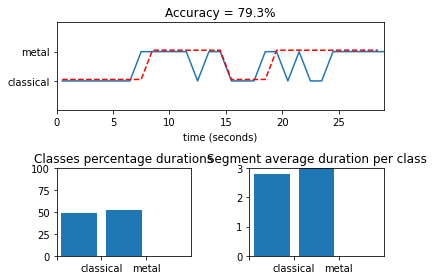

Overall Accuracy: 0.79

Fix-sized segments:
fix-sized segment 0: classical
fix-sized segment 1: classical
fix-sized segment 2: classical
fix-sized segment 3: classical
fix-sized segment 4: classical
fix-sized segment 5: classical
fix-sized segment 6: classical
fix-sized segment 7: metal
fix-sized segment 8: metal
fix-sized segment 9: metal
fix-sized segment 10: metal
fix-sized segment 11: metal
fix-sized segment 12: classical
fix-sized segment 13: metal
fix-sized segment 14: metal
fix-sized segment 15: classical
fix-sized segment 16: classical
fix-sized segment 17: classical
fix-sized segment 18: metal
fix-sized segment 19: metal
fix-sized segment 20: classical
fix-sized segment 21: metal
fix-sized segment 22: classical
fix-sized segment 23: classical
fix-sized segment 24: metal
fix-sized segment 25: metal
fix-sized segment 26: metal
fix-sized segment 27: metal
fix-sized segment 28: metal
fix-sized segment 29: metal

Segments:
segment 0 0.0 sec - 7.0 sec: classical
segment 1 7.0 sec - 

In [ ]:
# Example 11
# Supervised audio segmentation example:
#  - Apply model "svm_classical_metal" to achieve fix-sized, supervised audio segmentation 
#    on file data/music/metal_classical_mix.wav
#  - Function audioSegmentation.mid_term_file_classification() uses pretrained model and applies 
#    the mid-term step that has been used when training the model (1 sec in our case as shown in Example6)
#  - data/music/metal_classical_mix.segments contains the ground truth of the audio file

from pyAudioAnalysis.audioSegmentation import mid_term_file_classification, labels_to_segments
from pyAudioAnalysis.audioTrainTest import load_model
labels, class_names, _, _ = mid_term_file_classification("data/music/metal_classical_mix.wav", 
                                                         "svm_classical_metal", "svm_rbf",  True, 
                                                         "data/music/metal_classical_mix.segments")
print("\nFix-sized segments:")
for il, l in enumerate(labels):
    print(f'fix-sized segment {il}: {class_names[int(l)]}')

# load the parameters of the model (actually we just want the mt_step here):    
cl, m, s, m_classes, mt_win, mt_step, s_win, s_step, c_beat = load_model("svm_classical_metal")

# print "merged" segments (use labels_to_segments())
print("\nSegments:")
segs, c = labels_to_segments(labels, mt_step)
for iS, seg in enumerate(segs):
    print(f'segment {iS} {seg[0]} sec - {seg[1]} sec: {class_names[int(c[iS])]}')

In [ ]:
# Example 12: Unsupervised Music Segmentation
# 
# This example groups of song segments to clusters of similar content

import os, sklearn.cluster
from pyAudioAnalysis.MidTermFeatures import mid_feature_extraction as mT
from pyAudioAnalysis.audioBasicIO import read_audio_file, stereo_to_mono
from pyAudioAnalysis.audioSegmentation import labels_to_segments
from pyAudioAnalysis.audioTrainTest import normalize_features
import numpy as np
import scipy.io.wavfile as wavfile
import IPython

# read signal and get normalized segment feature statistics:
input_file = "data/music/billie_jean.wav"
fs, x = read_audio_file(input_file)
mt_size, mt_step, st_win = 5, 0.5, 0.1
[mt_feats, st_feats, _] = mT(x, fs, mt_size * fs, mt_step * fs,
                            round(fs * st_win), round(fs * st_win * 0.5))
(mt_feats_norm, MEAN, STD) = normalize_features([mt_feats.T])
mt_feats_norm = mt_feats_norm[0].T

# perform clustering
n_clusters = 5
x_clusters = [np.zeros((fs, )) for i in range(n_clusters)]
k_means = sklearn.cluster.KMeans(n_clusters=n_clusters)
k_means.fit(mt_feats_norm.T)
cls = k_means.labels_

# save clusters to concatenated wav files
segs, c = labels_to_segments(cls, mt_step)  # convert flags to segment limits
for sp in range(n_clusters):                
    count_cl = 0
    for i in range(len(c)):     # for each segment in each cluster (>2 secs long)
        if c[i] == sp and segs[i, 1]-segs[i, 0] > 2:
            count_cl += 1
            # get the signal and append it to the cluster's signal (followed by some silence)
            cur_x = x[int(segs[i, 0] * fs): int(segs[i, 1] * fs)]
            x_clusters[sp] = np.append(x_clusters[sp], cur_x)
            x_clusters[sp] = np.append(x_clusters[sp], np.zeros((fs,)))
    # write cluster's signal into a WAV file
    print(f'cluster {sp}: {count_cl} segments {len(x_clusters[sp])/float(fs)} sec total dur')        
    wavfile.write(f'cluster_{sp}.wav', fs, np.int16(x_clusters[sp]))
    IPython.display.display(IPython.display.Audio(f'cluster_{sp}.wav'))

cluster 0: 1 segments 27.5 sec total dur


cluster 1: 2 segments 151.0 sec total dur


cluster 2: 5 segments 88.0 sec total dur


cluster 3: 1 segments 7.0 sec total dur


cluster 4: 2 segments 33.0 sec total dur


In [ ]:
# Example 13
# Speaker clustering (diarization) example
# data/diarization_example.wav contains 4 speakers
# concatenated clusters should contain samples from separate speakers
#
import os, sklearn.cluster
from pyAudioAnalysis.MidTermFeatures import mid_feature_extraction as mT
from pyAudioAnalysis.audioBasicIO import read_audio_file, stereo_to_mono
from pyAudioAnalysis.audioSegmentation import labels_to_segments
from pyAudioAnalysis.audioTrainTest import normalize_features
import numpy as np
import scipy.io.wavfile as wavfile
import IPython

# read signal and get normalized segment feature statistics:
input_file = "data/diarization_example.wav"
fs, x = read_audio_file(input_file)
mt_size, mt_step, st_win = 2, 0.1, 0.05
[mt_feats, st_feats, _] = mT(x, fs, mt_size * fs, mt_step * fs,
                            round(fs * st_win), round(fs * st_win * 0.5))
(mt_feats_norm, MEAN, STD) = normalize_features([mt_feats.T])
mt_feats_norm = mt_feats_norm[0].T

# perform clustering
n_clusters = 4
x_clusters = [np.zeros((fs, )) for i in range(n_clusters)]
k_means = sklearn.cluster.KMeans(n_clusters=n_clusters)
k_means.fit(mt_feats_norm.T)
cls = k_means.labels_

# save clusters to concatenated wav files
segs, c = labels_to_segments(cls, mt_step)  # convert flags to segment limits
for sp in range(n_clusters):                
    count_cl = 0
    for i in range(len(c)):     # for each segment in each cluster (>2 secs long)
        if c[i] == sp and segs[i, 1]-segs[i, 0] > 2:
            count_cl += 1
            # get the signal and append it to the cluster's signal (followed by some silence)
            cur_x = x[int(segs[i, 0] * fs): int(segs[i, 1] * fs)]
            x_clusters[sp] = np.append(x_clusters[sp], cur_x)
            x_clusters[sp] = np.append(x_clusters[sp], np.zeros((fs,)))
    # write cluster's signal into a WAV file
    print(f'speaker {sp}: {count_cl} segments {len(x_clusters[sp])/float(fs)} sec total dur')        
    wavfile.write(f'diarization_cluster_{sp}.wav', fs, np.int16(x_clusters[sp]))
    IPython.display.display(IPython.display.Audio(f'diarization_cluster_{sp}.wav'))

speaker 0: 3 segments 22.5 sec total dur


speaker 1: 1 segments 22.0 sec total dur


speaker 2: 1 segments 19.9 sec total dur


speaker 3: 1 segments 21.8 sec total dur
